In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

### Phase Diagrams
We illustrate two examples of the Hamiltonian ODE using a phase space diagram:
#### Harmonic Oscillator
$$ V(q) = \frac{1}{2}q^2. $$
#### Duffing Oscillator
$$ V(q) = \frac{1}{2} \delta q^2 + \frac{1}{2} \beta q^4. $$

In [2]:
# Parameters for Duffing system:
beta = 1.1
delta = -1.1
def quadratic(q, p):
    return 0.5 * (q**2 + p**2)

def grad_quad(q, p):
    return np.array([p, -q])

def duffing(q, p):
    return 0.5 * delta * q**2 + 0.5 * beta * q**4 + 0.5 * p**2

def grad_duffing(q, p):
    return np.array([p, -delta * q - 2 * beta * q**3])

In [3]:
# Functions to integrate Hamiltonian ODE:
def integrate_ODE(q0, p0, gradH, T, dt):
    # Array of initial conditions:
    x0 = np.array([q0, p0])
    # Create callable for right-hand side:
    funode = lambda t, x: gradH(x[0], x[1])
    # Define time instances:
    tvec = np.arange(0, T, dt)
    sol = solve_ivp(funode, (0, T), np.array([q0, p0]), t_eval=tvec)

    return (sol.t, sol.y)

In [7]:
# Choose the system and right hand side
#system = "Harmonic Oscillator"
#potential = quadratic
#rhs = grad_quad

system = "Duffing"
potential = duffing
rhs = grad_duffing


Text(0.5, 1.0, 'Phase Diagram of Duffing')

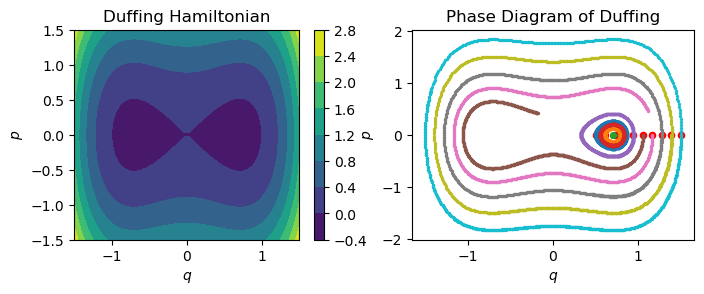

In [8]:
#qarray = np.linspace(0.5, 1.5, 10)
qarray = np.linspace(0.5, 1.5, 10)
parray = np.zeros(qarray.shape)
dt = 1e-2
T = 2*np.pi

plt.figure(figsize=(8, 6))

plt.subplot(2, 2, 1)
qp = np.linspace(-1.5, 1.5, 50)
QP, PP = np.meshgrid(qp, qp, indexing="ij")
cf = plt.contourf(QP, PP, potential(QP, PP))
plt.colorbar(cf)
plt.xlabel(r"$q$")
plt.ylabel(r"$p$")
plt.title("%s Hamiltonian"%system)


plt.subplot(2, 2, 2)
plt.scatter(qarray, parray, c="r", s=20)
rr = 0
for q0 in qarray:
    t, X = integrate_ODE(q0, parray[rr], rhs, T, dt)
    plt.scatter(X[0, :], X[1, :], s=2)

    rr += 1
plt.xlabel(r"$q$")
plt.ylabel(r"$p$")
plt.title("Phase Diagram of %s"%system)